In [1]:
#Let's import the required libraries

import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the csv file
df = pd.read_csv(r'spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


There are 5572 rows × 5 columns in the dataset

In [4]:
df.head(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


viewing first 15

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


All columns are object types

In [6]:
#checking null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

null Nan 

In [7]:
#Checking not null values
df.notnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,True,True,False,False,False
1,True,True,False,False,False
2,True,True,False,False,False
3,True,True,False,False,False
4,True,True,False,False,False
...,...,...,...,...,...
5567,True,True,False,False,False
5568,True,True,False,False,False
5569,True,True,False,False,False
5570,True,True,False,False,False


Lets drop unnecessary columns

In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5572, 2)

There are 5572 rows and 2 columns in the dataset after drop function

In [11]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

There are 4825 ham and 747 spam in v1 column

In [13]:
for i in range(0,5572):
    if df['v1'][i]=="spam":
        df['v1'][i]=1
    else:
        df['v1'][i]=0

In [14]:
df['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: object

In [15]:
df.v1.value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [16]:
#Lets rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [20]:
#lets cjeck random samples
df.sample(15)

,target,text
816,0,"He has lots of used ones babe, but the model d..."
2731,0,Mm feeling sleepy. today itself i shall get th...
5217,0,Well thats nice. Too bad i cant eat it
3345,0,U're welcome... Caught u using broken english ...
2974,0,"Don't worry, * is easy once have ingredients!"
5032,0,* Was really good to see you the other day dud...
4349,0,Yes. Rent is very expensive so its the way we ...
922,0,It shall be fine. I have avalarr now. Will hol...
1236,0,How much are we getting?
1003,0,&lt;#&gt; am I think? Should say on syllabus


In [21]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
#Lets check duplicates
df.duplicated().sum()

403

There are about 403 duplicates present in the dataset. Lets drop off the duplicates

In [23]:
df=df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

there are no duplicates after dropping columns

# Exploratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

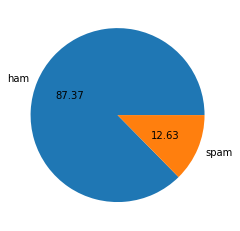

In [29]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalanced

In [30]:
import nltk

In [31]:
df['num_char']=df['text'].apply(len)

In [32]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

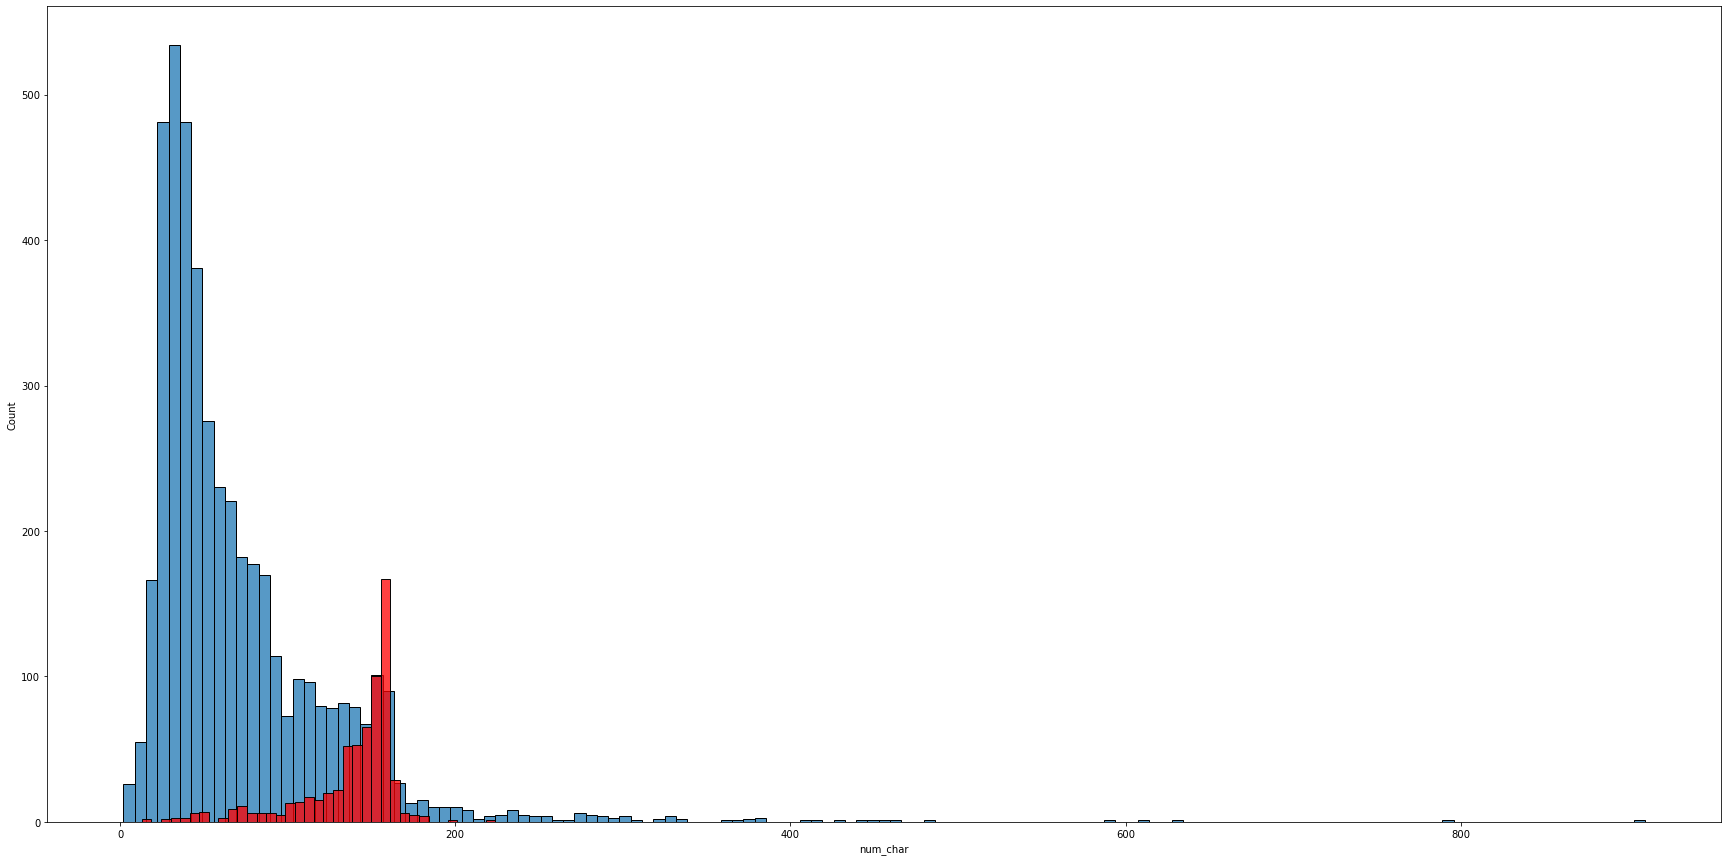

In [40]:
import seaborn as sns

plt.figure(figsize=(30,15))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<AxesSubplot:xlabel='num_word', ylabel='Count'>

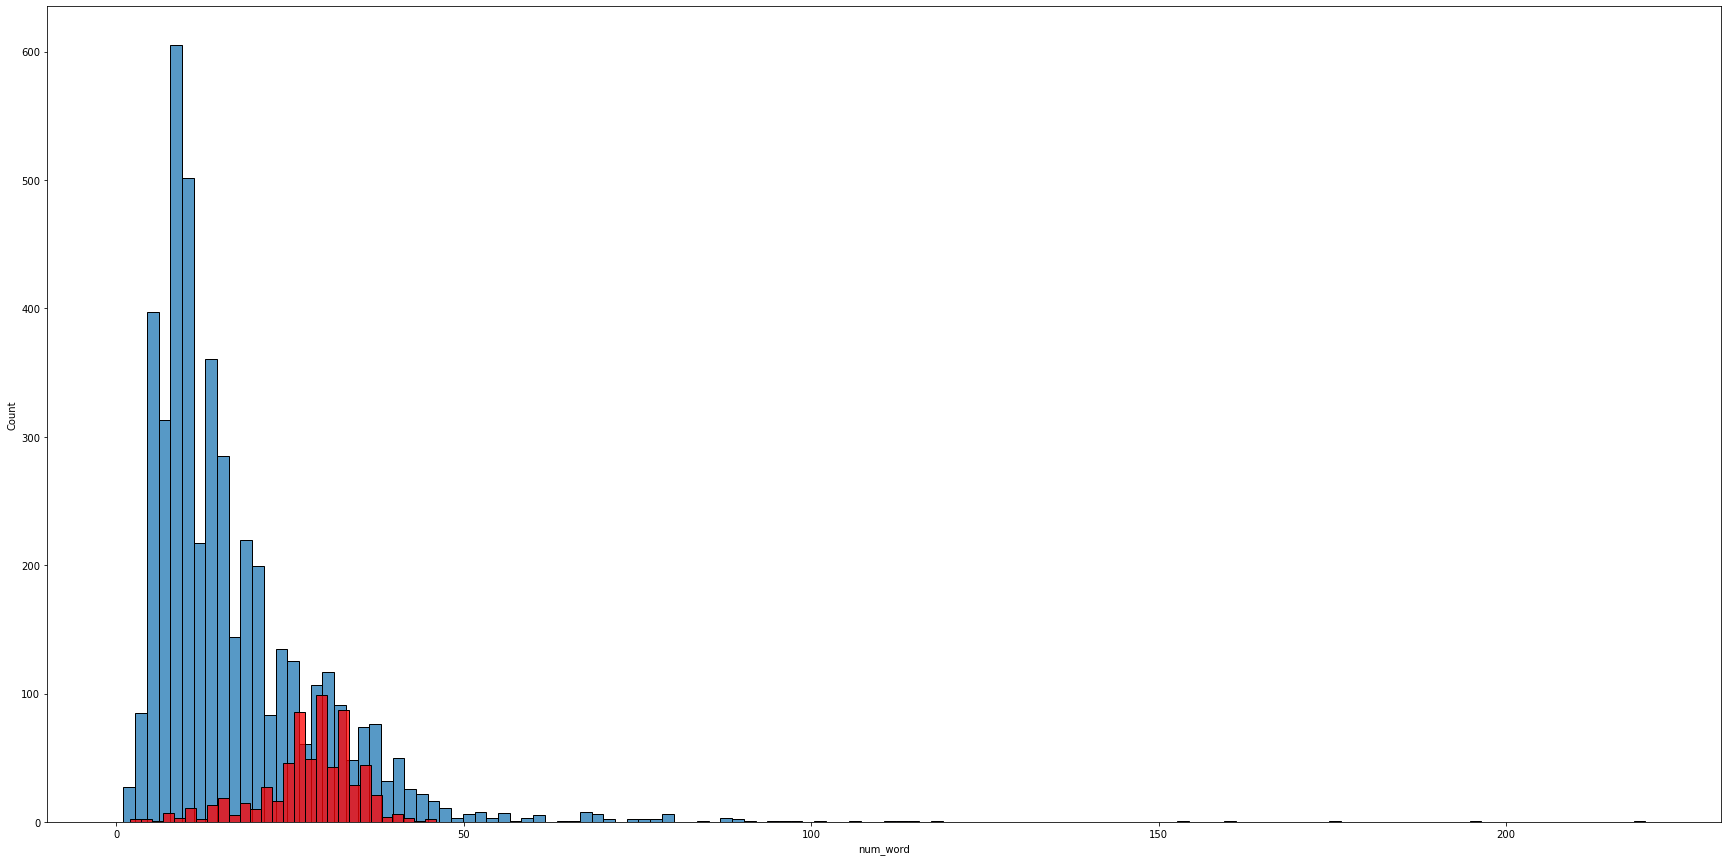

In [41]:
plt.figure(figsize=(30,15))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

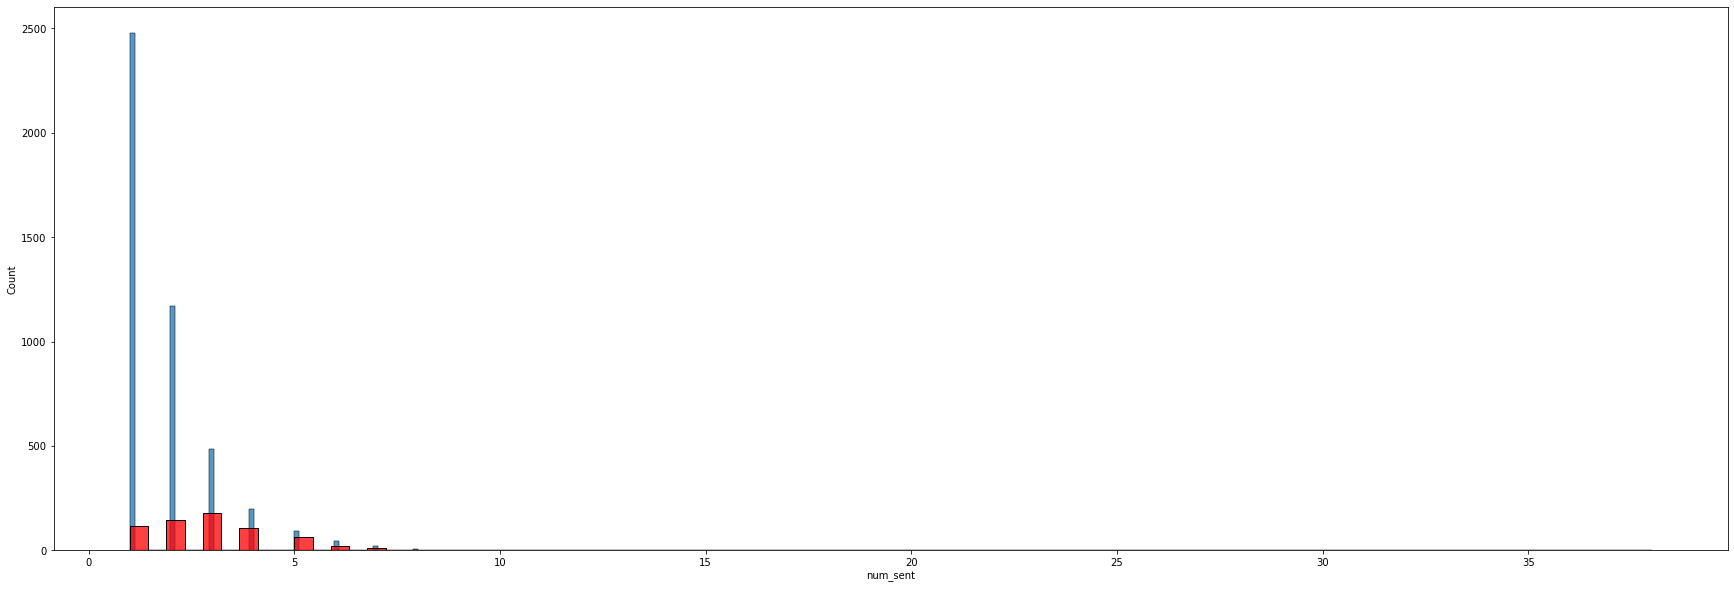

In [43]:
plt.figure(figsize=(30,10))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

<Figure size 2160x1080 with 0 Axes>

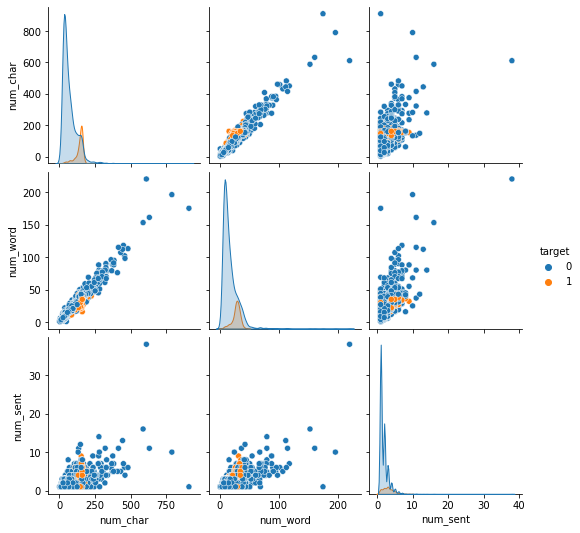

In [45]:
plt.figure(figsize=(30,15))
sns.pairplot(df,hue='target')

<AxesSubplot:>

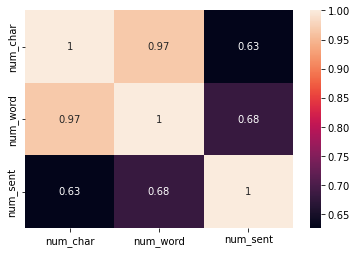

In [46]:
#Lets check heatmap
sns.heatmap(df.corr(),annot=True)

In [47]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Data Preprocessing

Data preprocessing will be done as follows
-Lower case

-tokenization

-remove special characters

-remove stop words

-stemming

In [49]:
#import the libraries required
from nltk.corpus import stopwords
import string

In [50]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [51]:
ps.stem('sleeping')

'sleep'

In [52]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

Lets test the code

In [54]:
transform_text('&lt;#&gt; am I think? Should say on syllabus')

'lt gt think say syllabu'

# transforming the text

In [55]:
df['trans_text']=df['text'].apply(transform_text)

In [56]:
df.head(10)

,target,text,num_char,num_word,num_sent,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


Lets use target trans_text

# Lets generate the word cloud

In [57]:
from wordcloud import WordCloud
wc= WordCloud(width=2000,height=2000,min_font_size=10,background_color='black')

In [58]:
spam_wc= wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

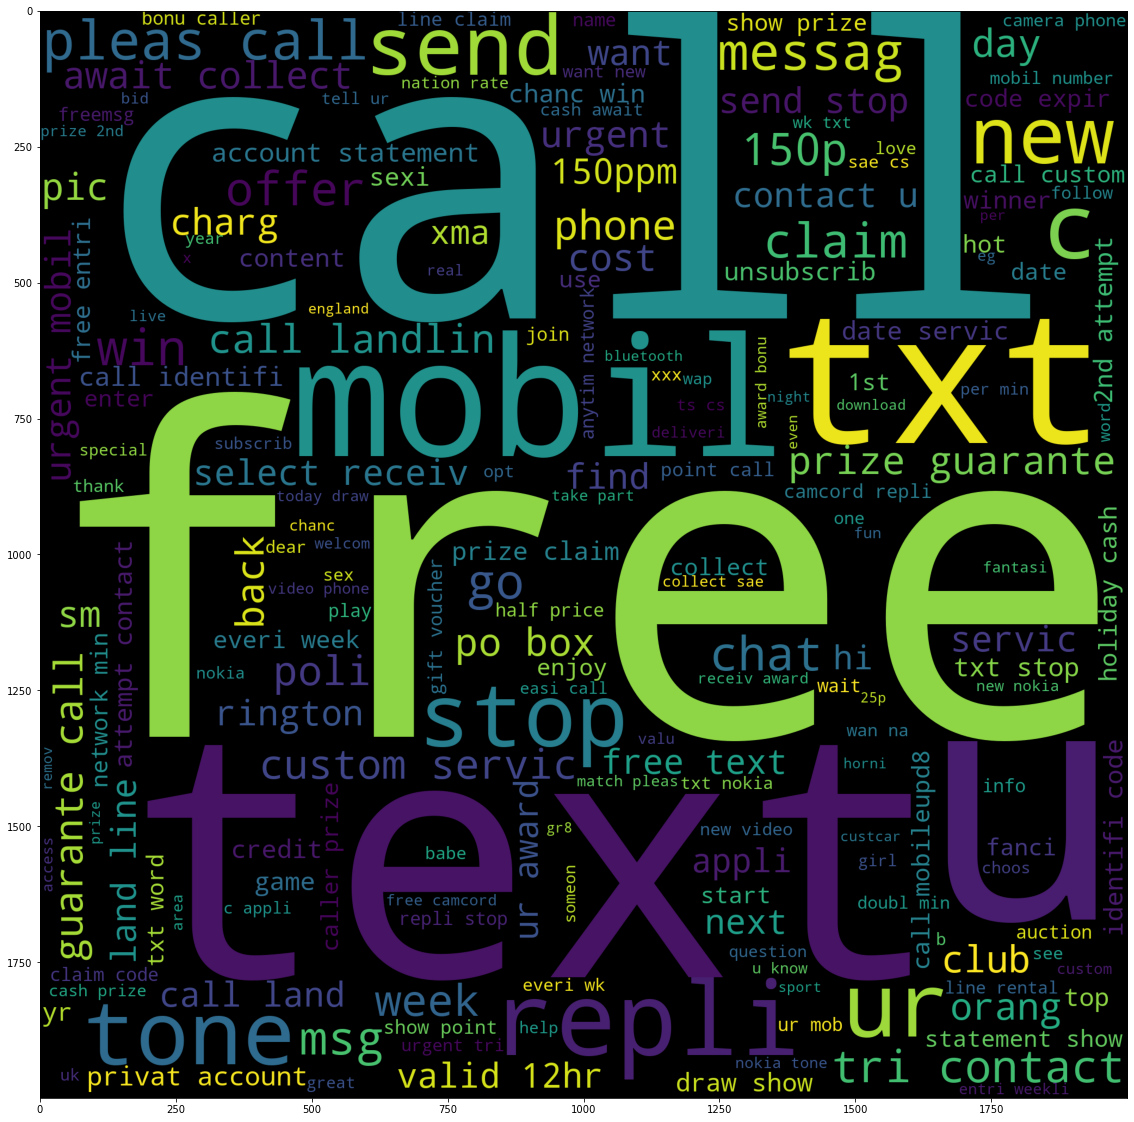

In [61]:
plt.figure(figsize=(40,20))
plt.imshow(spam_wc)

In [62]:
ham_wc= wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))

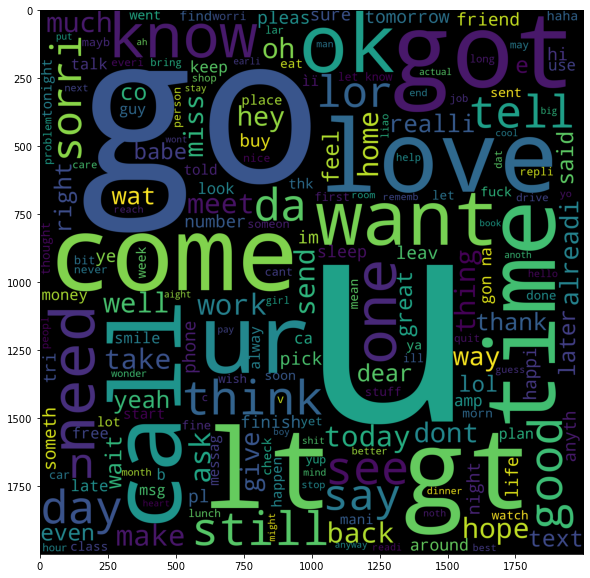

In [63]:
plt.figure(figsize=(30,10))
plt.imshow(ham_wc)

Accessing topmost used words

In [64]:
spam_corpus=[]
for i in df[df['target']== 1]['trans_text'].tolist():
    for j in i.split():
        spam_corpus.append(j)

In [65]:
len(spam_corpus)

9939

In [66]:
from collections import Counter

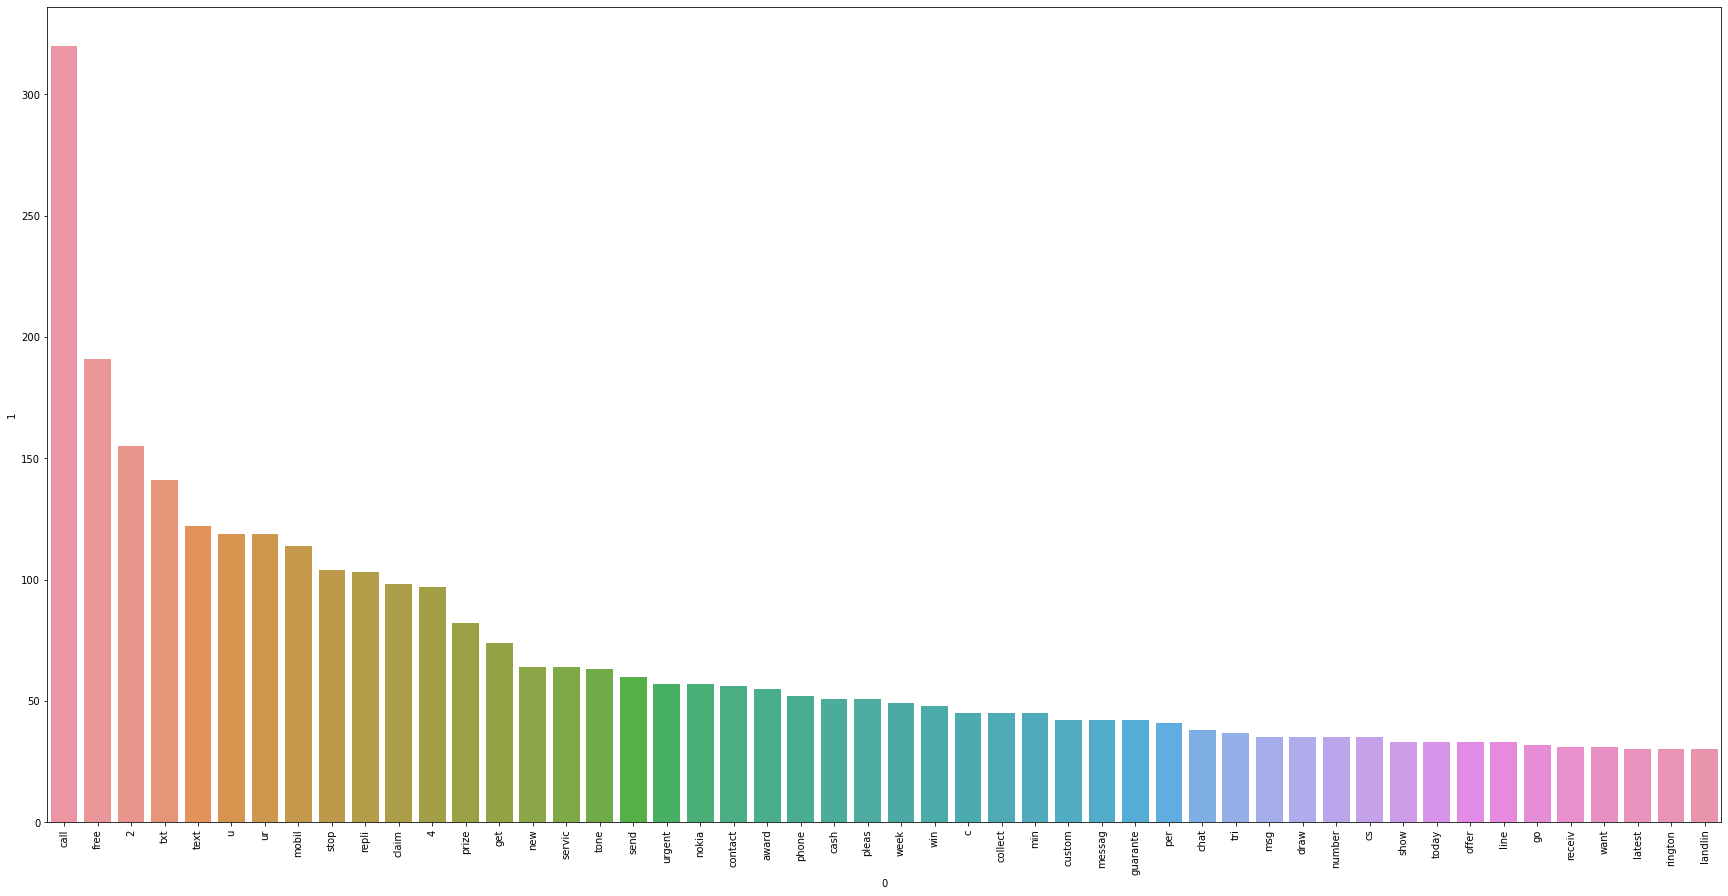

In [68]:
plt.figure(figsize=(30,15))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0],pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
ham_corpus=[]
for i in df[df['target']== 0]['trans_text'].tolist():
    for j in i.split():
        ham_corpus.append(j)
len(ham_corpus)

35402

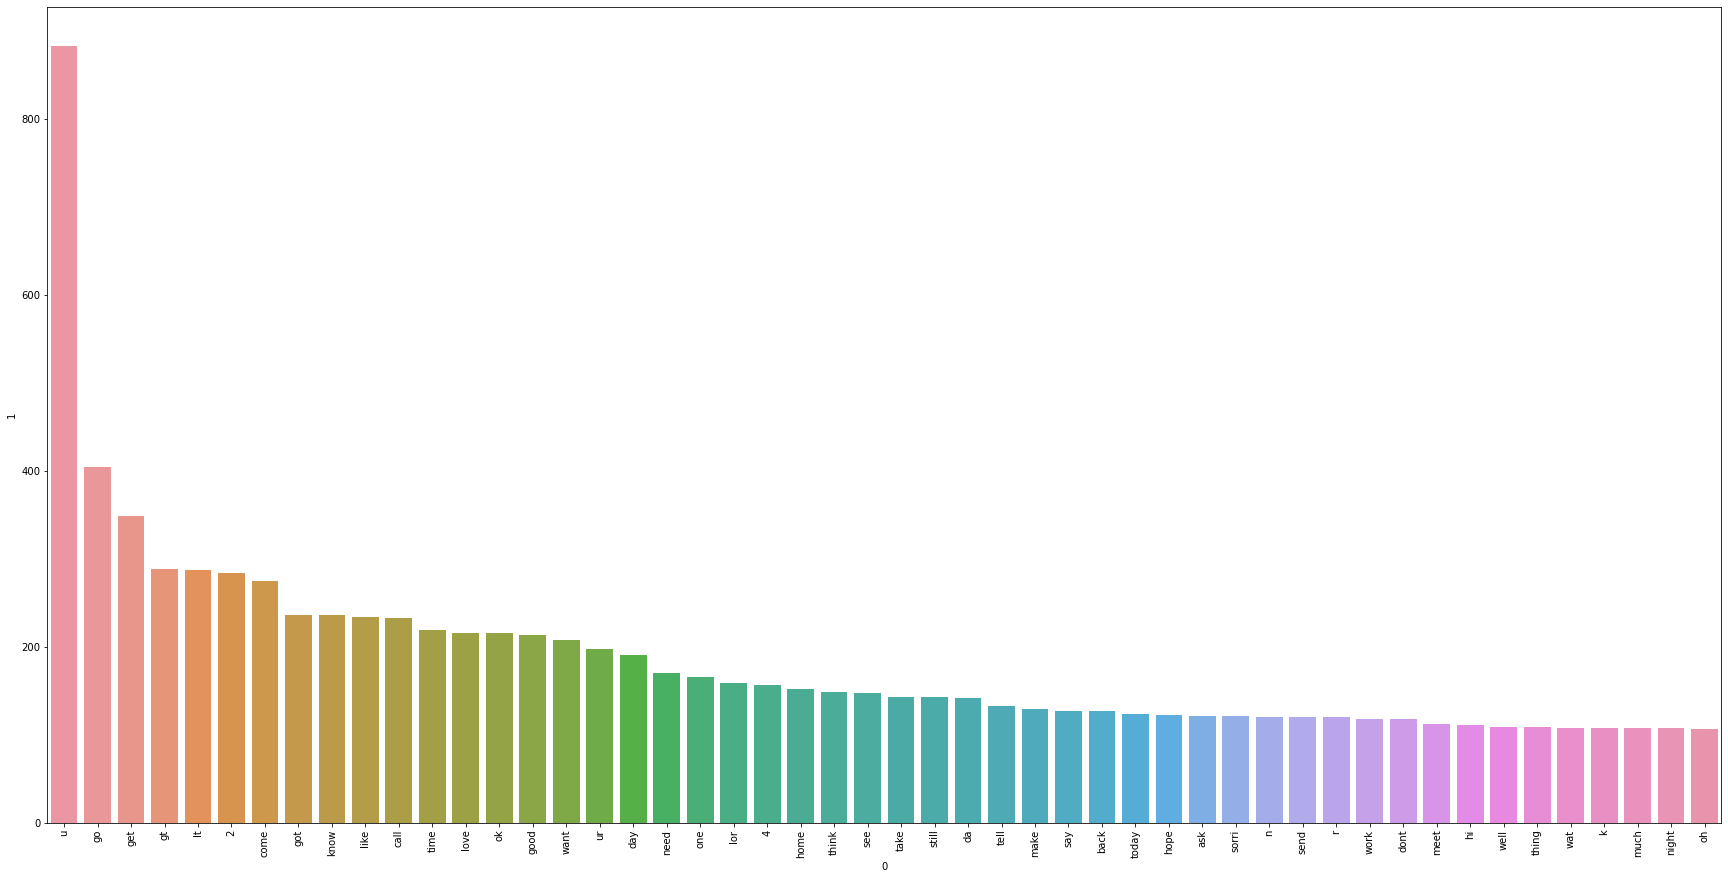

In [70]:
plt.figure(figsize=(30,15))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x = cv.fit_transform(df['trans_text']).toarray()

In [72]:
x.shape

(5169, 6708)

In [73]:
y = df['target'].values
y.shape

(5169,)

In [74]:
y=y.astype('int')

# Train test split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [77]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [78]:
y_train.astype

<function ndarray.astype>

# Model Building

# R F C

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

rfc = RandomForestClassifier(n_estimators=37, random_state=32)
rfc.fit(x_train,y_train)
y_rfc = rfc.predict(x_test)
y_pred=rfc.predict(x_test)
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test))
print('Random Forest precision_score : ', precision_score(y_test,y_pred))

Random Forest Accuracy_score:  0.9690522243713733
Random Forest confusion_matrix:  [[919  30]
 [  2  83]]
Random Forest precision_score :  0.9764705882352941


# KNeighbors Classification

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(x_train,y_train)

y_knc = knc.predict(x_test)
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))
print('KNeighbors confusion_matrix: ', confusion_matrix(y_test, y_knc))

KNeighbors Accuracy_score:  0.8907156673114119
KNeighbors confusion_matrix:  [[921   0]
 [113   0]]


# SVM Classification

In [85]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(x_train,y_train)
y_svc = svc.predict(x_test)
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))

SVM Accuracy:  0.9274661508704062
SVM confusion_matrix:  [[875  29]
 [ 46  84]]


# Naive bayes

In [90]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_mnb = mnb.predict(x_test)
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  0.971953578336557
Naive Bayes confusion_matrix:  [[901   9]
 [ 20 104]]


# Adaboost

In [91]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=37, random_state=32)
abc.fit(x_train,y_train)
y_abc = abc.predict(x_test)
print('AdaBoost Accuracy_score: ',accuracy_score(y_test,y_abc))
print('AdaBoost confusion_matrix: ', confusion_matrix(y_abc, y_test)) 

AdaBoost Accuracy_score:  0.9709864603481625
AdaBoost confusion_matrix:  [[914  23]
 [  7  90]]


# Model Fitting

In [124]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [127]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print('GaussianNB Accuracy_score: ',accuracy_score(y_test,y_pred1))
print('GaussianNB Confusion_matrix: ',confusion_matrix(y_test,y_pred1))
print('GaussianNB precision_score: ',precision_score(y_test,y_pred1))

GaussianNB Accuracy_score:  0.8733075435203095
GaussianNB Confusion_matrix:  [[803 118]
 [ 13 100]]
GaussianNB precision_score:  0.45871559633027525


In [128]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print('MultinomialNB Accuracy_score: ',accuracy_score(y_test,y_pred2))
print('MultinomialNB confusion_matrix: ',confusion_matrix(y_test,y_pred2))
print('MultinomialNB precision_score: ',precision_score(y_test,y_pred2))

MultinomialNB Accuracy_score:  0.971953578336557
MultinomialNB confusion_matrix:  [[901  20]
 [  9 104]]
MultinomialNB precision_score:  0.8387096774193549


MultinomialNB accuracy_score is decreased minimally

In [129]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('BernoulliNB Accuracy_score: ',accuracy_score(y_test,y_pred3))
print('BernoulliNB confusion_matrix: ',confusion_matrix(y_test,y_pred3))
print('BernoulliNB precision_score: ',precision_score(y_test,y_pred3))

BernoulliNB Accuracy_score:  0.9748549323017408
BernoulliNB confusion_matrix:  [[919   2]
 [ 24  89]]
BernoulliNB precision_score:  0.978021978021978


BernoulliNB accuracy tops compared to other and it fits our model perfectly

In [131]:
A=confusion_matrix(y_test,y_pred)
print(A)

[[921   0]
 [113   0]]


In [132]:
recall=A[0][0]/(A[0][0]+A[1][0])
precision=A[0][0]/(A[0][0]+A[0][1])
F1=2*recall*precision/(recall+precision)
print(F1)

0.9421994884910485


In [139]:
# saving the model to disk
import pickle
pickle.dump(classifier, open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))